# 머신러닝 분류와 강화학습

- 머신러닝
    - 데이터를 사용하여, 기계를 학습 시키는 기법
    - 기계, 즉 컴퓨터에 데이터를 주고 컴퓨터 스스로가 어떤 규칙이나 패턴을 찾는 것
    - 지도학습, 비지도 학습, 강화 학습으로 분류

## 지도 학습

<img src="./images/fig_01_01.png" width=600>

- 가장 전통적인 방법
- 입력(문제)과 출력(정답)을 쌍으로 묶은 데이터가 주어 진다
- 예를들어, 입력(이미지)을 출력(숫자)로 변환하는 방법 학습
- '정답 레이블'이 존재 한다는 점이 지도학습의 특징

## 비지도 학습

<img src="./images/fig_01_02.png" width=600>

- 정답을 알려주는 선생님이 없다
- 정답 레이블이 없는 데이터만 존재
- 데이터에 숨어 있는 구조나 패턴을 찾는 용도
- 군집화(클러스터링), 특징 추출, 차원 축소, t-SNE  알고리즘 등

## 강화 학습

<img src="./images/fig_01_03.png" width=600>

- **에이전트(agent)** : 행동 주체
    - 에이전트는 환경(environment)에 놓여져
    - 환경의 상태(state)를 관찰
    - 상태에 적합한 행동(action)을 취한다
    - 행동을 취한 결과로 환경의 상태가 바뀌고
    - 환경으로 부터 보상(reward)를 받음과 동시에,
    - '새로운 상태'를 관찰한다
- **강화학습의 목표** : 에이전트가 받는 보상의 총합을 극대화 하는 행동 패턴을 익히는 것

<img src="./images/fig_01_04.png" width=600>

- 로봇 보행 문제
    - 로봇은 현실 공간(또는 시뮬레이터)에 배치되어 걷는 방법을 배우고 있다
    - 로봇의 목표는 효율적으로 앞으로 나아가는 방법을 익히는 것
    - 로봇은 팔다리를 움직이는 행동을 취한다
    - 취한 행동에 따라 주변 환경(상태)이 변화 한다
    - 보상은 앞으로 나아간 거리
    - 로봇은 다양한 시행 착오를 통해 팔다리를 움직여 보고, 환경으로 부터 보상을 받아 최적의 행동 패턴을 익힌다
 
> 강화학습의 환경으로 부터 피드백인 '보상'은 정답 '레이블'과 성격이 다르다. 보상은 행동에 대한 피드백일 뿐, 그 보상으로 부터 지금까지의 행동이 최적인지 여부까지는 알수 없다. 반면 지도 학습은 '정답'이 제공된다. 즉, 지도학습을 강화학습의 맥락에서 보면, '최적의 행동'을 알려주는 선생님이 있다는 의미 이다.

# 밴디트 문제

## 밴디트 문제란?

- **밴디트(bandit)** 
    - 슬롯머신의 다른 이름
    - 원래는 도적의 의미
    - 슬롯머신을 하면 대부분 돈을 잃으니까

<img src="./images/fig_01_05.png" width=600>

- 멀티-암드 밴디트 문제
    - 팔이 많은 머신, 팔이 하나짜리 머신이 여러개 있는 것으로 치환 가능
    - 슬롯머신 각각의 특성이 서로 다르다
    - 환경 : 슬롯머신
    - 에이전트 : 플레이어

<img src="./images/fig_01_06.png" width=600>

- 환경과 에이전트 사이의 상호작용
    - 플레이어가 여러 슬롯머신 중 한대 선택 하여 플레이 (행동)
    - 행동의 결과 플레이어가 슬롯머신으로 부터 얻는 코인 (보상)
 
> 일반적인 강화 학습에서, 환경에는 **상태** 정보가 있다. 에이전트의 행동에 따라 환경의 상태가 바뀌고, 에이전트는 환경의 새로운 상태를 관찰하여 적절한 행동을 취한다. 다만, 밴디트 문제에서 슬롯머신들의 확률 설정에 변화는 없다. 상태가 변화 하는 문제는 '2장 마르코프 결정 과정' 에서 다룬다.

## 좋은 슬롯머신이란?

<img src="./images/fig_01_07.png" width=600>

- 두대의 슬롯머신과, 각각의 보상의 확률, 이를 확률분포표(probability distribution table)
- 일반적으로 이런 확률분포표를 플레이어가 알 수는 없다.
- 어떤 슬롯머신을 선택 하는 것이 좋은가?
- 기댓값(expectation value) 가 더 큰 쪽이 더 좋은 슬롯머신
    - 확률과 코인의 개수를 곱하여 합한 값
- 슬롯머신a : 1.05, 슬롯머신b : 0.95
> 강화학습에서는 기댓값이 **가치(value)** 혹은 **행동 가치(action value)** 가 된다.

## 수식으로 표현하기

- 보상 : "Reward"의 머리글자 따서 R로 표시
    - 밴디트 문제에서 코인의 개수
    - R은 '얻을 가능성'이 확률로 정해져 있음, 즉 **확률 변수(random variable)** 임
    - t번째 얻는 보상을 $R_t$로 표시
- 행동 : "Action"의 머리글자 따서 A로 표시
    - 슬롯머신 a, b를 선택하는 행동을 각각 a와 b라고 한다면, 변수 A는 {a, b} 중 하나의 값을 취함
- 기대값 : "Expectation"의 머리글자 따서 E로 표시
    - 보상 R의 기대값은 $E[R]$
    - 행동 A를 선택 했을 때 보상 기대값은 $E[R|A]$
    - 행동 a를 선택 했을 때 보상 기대값은 $E[R|A=a]$ 혹은 $E[R|a]$
- 행동가치 : 'Quality'의 머리글자 따서 Q또는 q로 표시
    - 보상에 대한 기대값
    - Q는 '추정치', q는 '실제값'
    - 행동 가치 $q(A) = E[R|A]$

# 밴디트 알고리즘
- 만약 각 슬롯머신의 가치(보상 기대값)을 알면 플레이는 가장 좋은 슬롯머신을 고를 수 있다
- 그러나 플레이어는 각 슬롯머신의 가치를 알 수 없다
- 따라서 플레이어는 각 슬롯머신의 가치를 추정 해야 한다.

## 가치 추정 방법

<img src="./images/fig_01_08.png" width=600>

- 각 슬롯머신의 1회 플레이 결과만 놓고 슬롯머신을 정하는 것은 신뢰 할 수 없다

<img src="./images/fig_01_09.png" width=600>

- a와 b를 3번씩 플레이, 이에 따른 각 슬롯머신의 가치 추정치
- $Q(a) = \frac{0+1+5}{3} = 2$
- $Q(b) = \frac{1+0+0}{3} = 0.33 \cdots$
- a가 좋다고 추정
> 슬롯머신을 실제 플레이 하여 얻은 보상은, 어떤 확률 분포에서 생성된 '샘플(표본)' 이다. 따라서 실제 획득한 보상의 평균을 **표본 평균(sample mean)** 이라 한다. 큰수의 법칙에 따라 샘플의 수가 늘어 날 수록 실제의 값에 가까워 진다

## 평균을 구하는 코드

- 슬롯머신 한대를 n번 플레이한 경우
- $R_1,R_2, \cdots , R_n$ 는 실제 얻는 보상
- $Q_n$는 행동 가치 추정치

<img src='./images/eq_01_01.png' width=600>

In [2]:
import numpy as np

np.random.seed(0)
rewards = []

for n in range(1, 11):
    reward = np.random.rand()
    rewards.append(reward)
    Q = sum(rewards)/n
    print(Q)

0.5488135039273248
0.6320014351498722
0.6222554154571295
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425


- n이 커질수록 계산 비용이 커진다.
- 효율적으로 $Q$를 구하는 방법
- n 대신 n-1까지 $Q$를 구하면 다음의 식이 된다.
- $Q_{n-1} = \frac{R_1+R_2+ \cdots +R_{n-1}}{n-1} $
- 이 식의 양번에 $n-1$를 곱하고 좌우 변을 바꾸면 다음 식이 얻어 진다.

<img src='./images/eq_01_02.png' width=600>

- 따라서 $Q_n$는 다음과 같다

<img src='./images/eq_01_03.png' width=600>

- 여기서 핵심은, 식 1.3에서 식 1.2를 대입하는 부분
- 이를 통해, 식 1.3에서 $Q_{n-1}$, $R_n$, $n$의 값만 알면, $R_1,R_2, \cdots , R_{n-1}$을 매번 사용하지 않고도 $Q_n$을 구할 수 있다.

- $Q_n$은 점화식으로 표현 가능하다

<img src='./images/eq_01_04.png' width=600>

<img src="./images/fig_01_10.png" width=600>

- $Q_{n-1}$이 $Q_n$으로 갱신될 때 $R_n - Q_{n-1}$에 $\frac{1}{n}$를 곱한 만큼 이동
- 다시 말하면, $Q_{n-1}$이 $R_n$방향으로 얼마나 증가 할 지는 $\frac{1}{n}$ 값이 결정
- $\frac{1}{n}$를 **학습률(learning rate)** 라고 함
> $n$이 커질 수록, 학습률은 작아짐, 즉, $n$이 무한대로 가면,  $Q_n = Q_{n-1}$

In [3]:
Q = 0
for n in range(1, 11):
    reward = np.random.rand()
    Q = Q + (reward -Q)/n
    print(Q)

0.7917250380826646
0.6603099789177845
0.6295548396431672
0.7035652893055406
0.5770594430840099
0.49540441918693173
0.4275207017945595
0.4781580947637318
0.5114912787844116
0.5473433657306523


<img src="./images/fig_01_11.png" width=600>

In [4]:
Q = 0
for n in range(1, 11):
    reward = np.random.rand()
    # Q = Q + (reward -Q)/n
    Q += (reward - Q)/n    
    print(Q)

0.978618342232764
0.8888884532247439
0.7464187562341399
0.7549463612472188
0.6276119741715617
0.6296634820308887
0.5601905970849113
0.6082503870804954
0.5986501575993372
0.5802513358384558


- 이와 같이 $Q_1, Q_2, Q_3 \cdots$을 하나씩 순차적으로 증가 시키며 구할 수 있다는 의미로 **증분 구현(incremental implementation)** 라고 함

## 플레이어의 정책

- **탐욕 정책(greedy policy)**
    - 플레이어는 플레이한 결과중 가장 가치 추정치(획득 보상 평균)가 가장 큰 슬롯 머신을 선택 한다.
    - greedy 는 미래는 고려치 않고 당장의 결과만 놓고 최선의 선택을 한다는 의미
    - 그림 1-8과 같이 한번한 플레이한 경우, 계속 b만 선택

<img src="./images/fig_01_08.png" width=600>

- **$\epsilon$-탐욕 정책**
    - **활용(exploitation)** : 지금까지 실제로 플레이한 결과 중 가장 가치 추정치가 좋은 슬롯머신 선택
    - **탐색(exploration)** : 다른 슬롯머신 시도
    - $\epsilon$의 확률로 탐색을 하고, $1-\epsilon$의 확률로 활용을 하는 전략

> 활용과 탐색은 상충 관계임

# 밴디트 알고리즘 구현

- 조건을 단순화 하여, 슬롯머신은 코인을 최대 1개 반환 한다. (승리 1, 패배 0)
- 슬롯머신의 승리 확률은 정해져 있고 플에이어는 이를 알지 못한다
- 슬롯머신은 총 10대이고, 플레이어는 경험을 통해 이중 가장 승률이 높은 슬롯머신을 찾아야 한다.

## 슬롯머신 구현

In [1]:
import numpy as np

class Bandit:
    def __init__(self, arms=10):
        self.rates = np.random.rand(arms) # 0.0 이상 1.0 이하의 무작위 수 균등 분포로 arms 개 생성 (arms 값이 없으면 1개 생성)

    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand(): 
            return 1
        else:
            return 0

In [6]:
bandit = Bandit()

for i in range(3):
    print(bandit.play(0))

1
1
1


## 에이전트 구현

- 2번째 머신을 10번 연속 플레이시 가치 추정치

In [8]:
bandit = Bandit()

Q = 0

for n in range(1, 11):
    reward = bandit.play(2)    # 2번째 슬롯머신 플레이
    Q += (reward -Q)/n         # 가치 추정치 갱신
    print(Q)

1.0
0.5
0.33333333333333337
0.25
0.2
0.16666666666666669
0.14285714285714288
0.12500000000000003
0.11111111111111113
0.10000000000000002


- 10대의 슬롯머신 각각의 가치 추정치 구하기

In [10]:
bandit = Bandit()
Qs = np.zeros(10) # 각 슬롯머신의 가치 추정치
ns = np.zeros(10) # 각 슬롯머신의 플레이 횟수

for n in range(100):
    action = np.random.randint(0, 10) # 무작위 행동(임의 슬롯머신 선택)
    reward = bandit.play(action)

    ns[action] += 1 # action번째 슬롯머신 플레이한 횟수 갱신
    Qs[action] += (reward - Qs[action]) / ns[action]
    print(Qs)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
[0.  0.  0.  0.  0.5 0.  0.  1.  0.  1. ]
[0.         0.         0.         0.         0.5        0.
 0.         1.         0.         0.66666667]
[0.         0.         0.         0.         0.5        0.
 0.         1.         0.         0.66666667]
[0.   0.   0.   0.   0.5  0.   0.   1.   0.   0.75]
[0.   0.   1.   0.   0.5  0.   0.   1.   0.   0.75]
[0.         0.         1.         0.         0.66666667 0.
 0.         1.         0.         0.75      ]
[0.         0.         1.         0.         0.66666667 0.
 0.         1.         0.         0.75      ]
[0.   0.   1.   0.   0.75 0.   0.   1.   0.   0.75]
[0.   0.   1.   0.   0.75 0.   0.   1.   1.   0.75]
[0.   0.   1.   0.   0.75 0.   0.   1.   1.   0.75]
[0.   0.   1.   0.   0

- $\epsilon$-탐욕 정책을 따르는 Agent 클래스

In [12]:
class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon # 탐색 확률
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward): # 가치 추정
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    def get_action(self): # 행동 선택
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs)) # 무작위 행동 선택
        return np.argmax(self.Qs) # 탐욕 행동 선택

## 실행해보기

In [13]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []  # 보상 합
rates = []          # 승률

for step in range(steps):
    action = agent.get_action()   # 행동 선택
    reward = bandit.play(action)  # 실제로 플레이하고 보상을 받음
    agent.update(action, reward)  # 행동과 보상을 통해 학습
    total_reward += reward

    total_rewards.append(total_reward)       # 현재까지의 보상 합 저장
    rates.append(total_reward / (step + 1))  # 현재까지의 승률 저장

print(f'{steps}중 {total_reward}번 승리')

1000중 889번 승리


- [그림 1-12] 단계별 보상 총합
- 단계가 늘어날 수록 보상의 총합은 꾸준히 증가

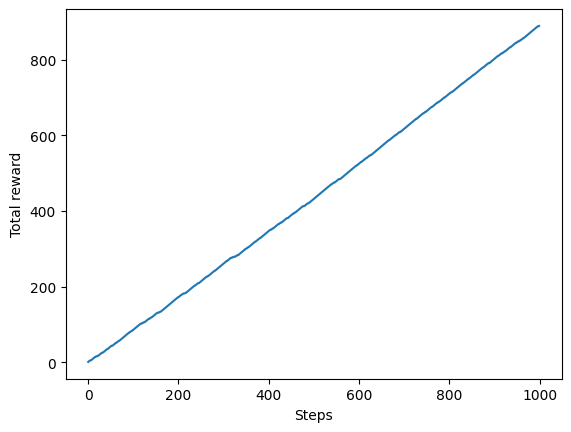

In [14]:
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

- [그림 1-13] 단계별 승률
- 세로 축은 승률, 단계를 거듭할 수록 승률이 올라간다.

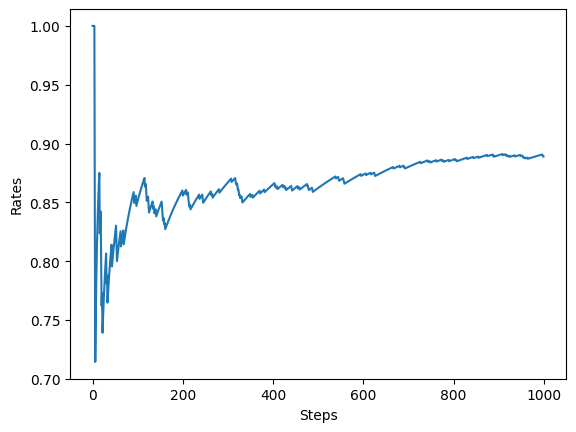

In [15]:
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

## 알고리즘의 평균적인 특성

<img src="./images/fig_01_14.png" width=600>

- 코드의 무작위성 때문에, 실험 때 마다 결과가 달라질 수 있다.
- 신뢰도를 높이기 위해, 1000번 플레이 하는 실험은 200번 반복 하여, 아래와 같이 평균을 낸다.

<img src="./images/fig_01_15.png" width=600>

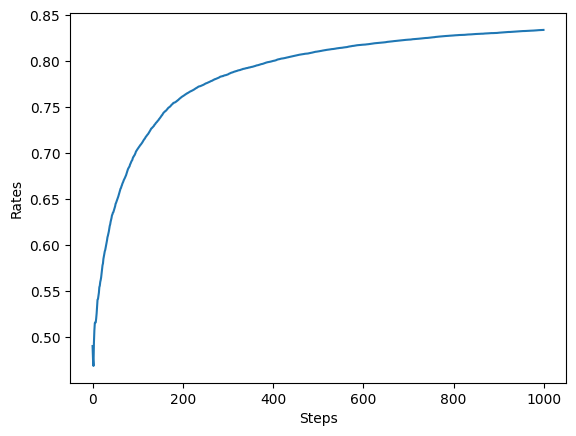

In [16]:
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))  # (200, 1000) 형상 배열

for run in range(runs):  # 200번 실험
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward
        rates.append(total_reward / (step + 1))

    all_rates[run] = rates  # 보상 결과 기록

avg_rates = np.average(all_rates, axis=0)  # 각 단계의 평균 저장

# [그림 1-16] 단계별 승률(200번 실험 후 평균)
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

<img src="./images/fig_01_17.png" width=600>

- $\epsilon$에 따라 승률이 달라 진다.
- 최적의 $\epsilon$은 문제에 따라 달라 진다.

# 비정상 문제

- **정상 문제(stationary problem)** : 보상의 확률 분포가 변하지 않는 문제
- 만약, 플레이 할 때 마다, 각 슬롯머신의 보상 확률이 변한다면?

In [17]:
class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)

    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(self.arms)  # 노이즈 추가
        if rate > np.random.rand():
            return 1
        else:
            return 0

-  np.random.randn()은 평균이 0, 표준편차라 1인 정규 분포를 따르는 무작위수 생성
-  **비정상 문제(non-stationary problem)** : 보상의 확률 분포가 변하는 문제

## 비정상 문제를 풀기 위해서

-슬롯머신의 가치 추정을 위한 표본 평균 계산은 다음과 같다.

<img src='./images/eq_01_01_02.png' width=600>

- 표본 평균은 획득한 보상의 평균으로 모든 보상 앞에 가중치 $\frac{1}{n}$ 이 붙어 있다.

<img src="./images/fig_01_18.png" width=600>

- 모든 보상에 동일한 가중치, 모든 보상을 동일하게 취급
- 비정상 문제에서는, 시간이 흐르면 환경(슬롯머신)이 변하기 때문에 과거 데이터(보상)의 중요도가 낮아져야 한다

<img src='./images/eq_01_05.png' width=600>

- 따라서 식 1.5와 같이 증분 방식으로 $Q_n$을 갱신 하는 방법을 

<img src='./images/eq_01_06.png' width=600>

- $\frac{1}{n}$ 대신 고정된 $\alpha$ 를 ($0 < \alpha <  1$)를 사용하면

<img src="./images/fig_01_19.png" width=600>

- 이와 같이 과거로 갈수록 비중을 줄이는 식으로 고칠 수 있다.

<img src='./images/eq_01_07.png' width=600>

<img src='./images/eq_01_08.png' width=600>

<img src='./images/eq_01_09.png' width=600>

<img src='./images/eq_01_10.png' width=600>

- 과거로 갈수록 가중치가 기하급수적으로 감소 한다.
- 이와 같은 방식을 **지수 이동 평균(exponential moving average)** 또는 **지수 가중 이동 평균(exponential weighted moving average)** 라고 한다.

> 식 1.10에서, $Q_n$를 구할 때 $Q_0$이 사용되었다. $Q_0$는 행동 가치 초기값으로 $Q_n$은 $Q_0$의 영향(편향)을 받는다. 표본평균의 경우 첫 번째 보상을 받으면 사용자가 부여한 초기값은 사라지기 때문에 이러한 편향이 없다. 

## 비정상 문제 풀기

- 고정된 변수 $\alpha$로 가치 추정치를 갱신

In [18]:
class AlphaAgent:
    def __init__(self, epsilon, alpha, actions=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(actions)
        self.alpha = alpha  # 고정값 α

    def update(self, action, reward):
        # α로 갱신
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

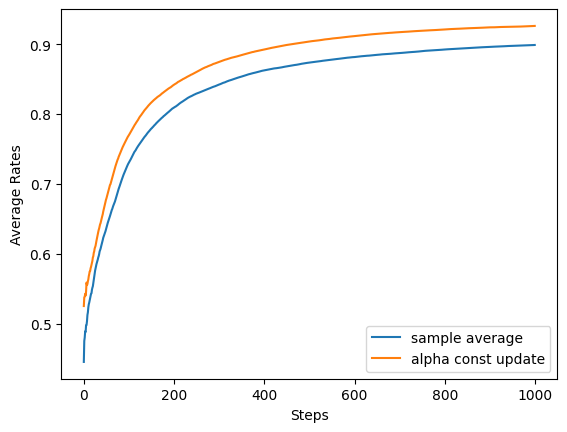

In [19]:
runs = 200
steps = 1000
epsilon = 0.1
alpha = 0.8
agent_types = ['sample average', 'alpha const update']
results = {}

for agent_type in agent_types:
    all_rates = np.zeros((runs, steps))  # (200, 1000)

    for run in range(runs):
        if agent_type == 'sample average':
            agent = Agent(epsilon)
        else:
            agent = AlphaAgent(epsilon, alpha)

        bandit = NonStatBandit()
        total_reward = 0
        rates = []

        for step in range(steps):
            action = agent.get_action()
            reward = bandit.play(action)
            agent.update(action, reward)
            total_reward += reward
            rates.append(total_reward / (step + 1))

        all_rates[run] = rates

    avg_rates = np.average(all_rates, axis=0)
    results[agent_type] = avg_rates

# [그림 1-20] 표본 평균과 고정값 α에 의한 갱신 비교
plt.figure()
plt.ylabel('Average Rates')
plt.xlabel('Steps')
for key, avg_rates in results.items():
    plt.plot(avg_rates, label=key)
plt.legend()
plt.show()

- 처음앤 표본 평균 쪽이 우세하지만 갈 수록 고정값 $\alpha$ 갱신 결과가 우세 해 짐
- 즉 표본 평균으로는 시간의 변화에 대응을 하지 못함

# 정리

- 강화 학습은, 지도학습이나 비지도 학습과 환경와 에이전트의 상호작용을 이용한다는 점에서 차이가 있다.
- 에이전트는 자신의 행동에 따른 보상의 총합이 극대화 되도록 행동 패턴을 익히는 것을 목표로 한다
- 밴디트 문제를 풀기 위한 알고리즘은, 여러 선택지 중 최선의 선택을 고르는 문제에 적용 가능 하다
- 밴디트 문제 그리고 강화학습 에서는 '활용과 탐색' 간의 균얼을 맞추는 것이 중요하다
- $\epsilon$-탐욕 정책은 가끔은 탐색을 하지만 그 외에는 활용을 하는 알고리즘이다
- 두가지 평균
    - 표본 평균 : 모든 보상에 균일한 가중치 
    - 지수 이동 평균 : 최근에 얻은 보상일 수록 높은 가중치